In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
ST = Base.classes.station
MS = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
columnss = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
for c in columnss:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
#session.query(func.count(ST.date)).all()
session.query(func.count(MS.date)).all()

[(19550,)]

In [10]:
# Find the most recent date in the data set.
session.query(MS.date).order_by(MS.date.desc()).first()

('2017-08-23',)

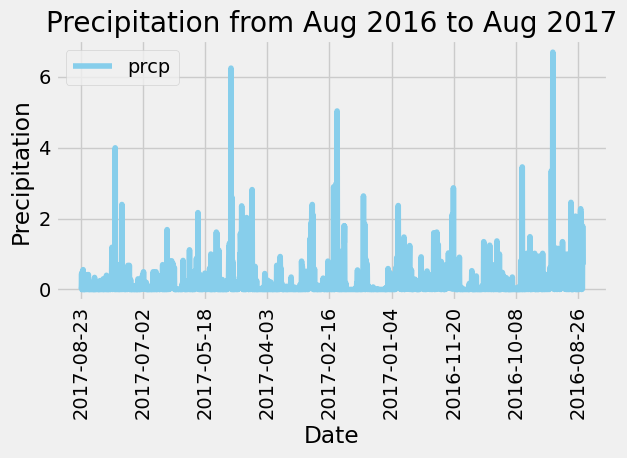

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.datetime(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
thession = session.query(MS.date).filter(MS.date > '2016-08-22').order_by(MS.date.desc())
meshin = thession.with_entities(MS.date, MS.prcp).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(meshin,columns=['date','prcp'])
df
# Sort the dataframe by date
df = df.dropna()
df.set_index('date', inplace = True)
df
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.line(color = 'skyblue')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation from Aug 2016 to Aug 2017')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
pprint(df.describe())


              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


In [14]:
stats = df.describe()
stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset


In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [19]:
# Close Session
session.close()